<a href="https://colab.research.google.com/github/RonaldGarcia02/Predicting-Team-Win-Percentage/blob/main/Predicting_Team_Win_Percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting a team's win percentage using payroll, attendance, and offensive stats

# Cleaning Data

In [305]:
import pandas as pd

Importing Data

In [306]:
stats = pd.read_csv('stats.csv', index_col=0)

In [307]:
stats.head()

,Rank,Team,Total Attendance,Avg. Attendance,Approx. Payroll,W-L Record,W Record,L Record,Run Difference,RK,...,Runs/Games,Hits,Stolen Bases,Walks,Stike Outs,Batting Average,On Base %,Slugging %,Unnamed: 20,Unnamed: 21
Year,,,,,,,,,,,,,,,,,,,,,
2024.0,13.0,AZ Diamondbacks,"2,341,876","28,912","$161,660,152",0.54938,89.0,73.0,0.6,8.0,...,5.47,1452.0,119.0,569.0,1265.0,0.263,0.337,0.440,NaN,NaN
2024.0,10.0,ATL Braves,"3,011,755","37,182","$241,662,300",0.54938,89.0,73.0,0.6,9.0,...,4.35,1333.0,69.0,485.0,1461.0,0.243,0.309,0.415,NaN,NaN
2024.0,11.0,BAL Orioles,"2,281,129","28,162","$117,347,715",0.56173,91.0,71.0,0.5,7.0,...,4.85,1391.0,98.0,489.0,1359.0,0.250,0.315,0.435,NaN,NaN
2024.0,18.0,BOS Red Sox,"2,659,949","32,839","$160,834,775",0.50000,81.0,81.0,0.0,18.0,...,4.64,1404.0,144.0,493.0,1570.0,0.252,0.319,0.423,NaN,NaN
2024.0,15.0,CHI Cubs,"2,909,794","35,923","$223,048,500",0.51235,83.0,79.0,0.4,16.0,...,4.54,1318.0,143.0,546.0,1362.0,0.242,0.317,0.393,NaN,NaN


In [308]:
stats.dtypes

,0
Rank,float64
Team,object
Total Attendance,object
Avg. Attendance,object
Approx. Payroll,object
W-L Record,float64
W Record,float64
L Record,float64
Run Difference,float64
RK,float64


In [309]:
stats["Team"].value_counts()

,count
Team,
AZ Diamondbacks,15
ATL Braves,15
BAL Orioles,15
BOS Red Sox,15
CHI Cubs,15
CHI White Sox,15
CIN Reds,15
CLE Guardians,15
COL Rockies,15


Merged together the KAS royals and KC Royals team names

In [310]:
stats['Team'] = stats['Team'].replace({'KAS Royals': 'KC Royals'})

Turning team name object into a numerical code

In [311]:
stats["team_code"] = stats["Team"].astype('category').cat.codes

In [312]:
stats.head()

,Rank,Team,Total Attendance,Avg. Attendance,Approx. Payroll,W-L Record,W Record,L Record,Run Difference,RK,...,Hits,Stolen Bases,Walks,Stike Outs,Batting Average,On Base %,Slugging %,Unnamed: 20,Unnamed: 21,team_code
Year,,,,,,,,,,,,,,,,,,,,,
2024.0,13.0,AZ Diamondbacks,"2,341,876","28,912","$161,660,152",0.54938,89.0,73.0,0.6,8.0,...,1452.0,119.0,569.0,1265.0,0.263,0.337,0.440,NaN,NaN,1
2024.0,10.0,ATL Braves,"3,011,755","37,182","$241,662,300",0.54938,89.0,73.0,0.6,9.0,...,1333.0,69.0,485.0,1461.0,0.243,0.309,0.415,NaN,NaN,0
2024.0,11.0,BAL Orioles,"2,281,129","28,162","$117,347,715",0.56173,91.0,71.0,0.5,7.0,...,1391.0,98.0,489.0,1359.0,0.250,0.315,0.435,NaN,NaN,2
2024.0,18.0,BOS Red Sox,"2,659,949","32,839","$160,834,775",0.50000,81.0,81.0,0.0,18.0,...,1404.0,144.0,493.0,1570.0,0.252,0.319,0.423,NaN,NaN,3
2024.0,15.0,CHI Cubs,"2,909,794","35,923","$223,048,500",0.51235,83.0,79.0,0.4,16.0,...,1318.0,143.0,546.0,1362.0,0.242,0.317,0.393,NaN,NaN,4


In [313]:
stats.isnull().sum()

,0
Rank,1
Team,1
Total Attendance,1
Avg. Attendance,1
Approx. Payroll,1
W-L Record,1
W Record,2
L Record,2
Run Difference,1
RK,100


In [314]:
stats = stats.drop(columns=['RK', 'Unnamed: 20', 'Unnamed: 21'], errors='ignore')

In [315]:
stats[stats.isnull().any(axis=1)]

,Rank,Team,Total Attendance,Avg. Attendance,Approx. Payroll,W-L Record,W Record,L Record,Run Difference,Total Games,Runs/Games,Hits,Stolen Bases,Walks,Stike Outs,Batting Average,On Base %,Slugging %,team_code
Year,,,,,,,,,,,,,,,,,,,
2024.0,26.0,OAK Athletics,"922,286","11,386","$55,690,000",0.0,NaN,NaN,-0.7,0.0,3.97,1267.0,98.0,493.0,1502.0,0.233,0.301,0.393,19
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


Dropped the 2024 Oakland Athletics

In [316]:
stats = stats.dropna()

In [317]:
stats.columns = stats.columns.str.lower().str.replace(' ', '_')

In [318]:
stats['total_attendance'] = stats['total_attendance'].astype('str').str.replace(',', '', regex=False).astype('float64')

In [319]:
stats['avg._attendance'] = stats['avg._attendance'].astype('str').str.replace(',', '', regex=False).astype('float64')

In [320]:
stats = stats.rename(columns={'avg._attendance':'avg_attendance','w-l_record':'win_percentage','stike_outs':'strike_outs'})

In [321]:
stats['approx_payroll'] = stats['approx._payroll_'].replace('[\$,]', '', regex=True).astype(float)

In [322]:
stats = stats.drop(columns=['approx._payroll_'])

In [323]:
stats.dtypes

,0
rank,float64
team,object
total_attendance,float64
avg_attendance,float64
win_percentage,float64
w_record,float64
l_record,float64
run_difference,float64
total_games,float64
runs/games,float64


In [324]:
stats.head()

,rank,team,total_attendance,avg_attendance,win_percentage,w_record,l_record,run_difference,total_games,runs/games,hits,stolen_bases,walks,strike_outs,batting_average,on_base_%,slugging_%,team_code,approx_payroll
Year,,,,,,,,,,,,,,,,,,,
2024.0,13.0,AZ Diamondbacks,2341876.0,28912.0,0.54938,89.0,73.0,0.6,162.0,5.47,1452.0,119.0,569.0,1265.0,0.263,0.337,0.440,1,161660152.0
2024.0,10.0,ATL Braves,3011755.0,37182.0,0.54938,89.0,73.0,0.6,162.0,4.35,1333.0,69.0,485.0,1461.0,0.243,0.309,0.415,0,241662300.0
2024.0,11.0,BAL Orioles,2281129.0,28162.0,0.56173,91.0,71.0,0.5,162.0,4.85,1391.0,98.0,489.0,1359.0,0.250,0.315,0.435,2,117347715.0
2024.0,18.0,BOS Red Sox,2659949.0,32839.0,0.50000,81.0,81.0,0.0,162.0,4.64,1404.0,144.0,493.0,1570.0,0.252,0.319,0.423,3,160834775.0
2024.0,15.0,CHI Cubs,2909794.0,35923.0,0.51235,83.0,79.0,0.4,162.0,4.54,1318.0,143.0,546.0,1362.0,0.242,0.317,0.393,4,223048500.0


# Random Forest Model

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
stats.columns

Index(['rank', 'team', 'total_attendance', 'avg_attendance', 'win_percentage',
       'w_record', 'l_record', 'run_difference', 'total_games', 'runs/games',
       'hits', 'stolen_bases', 'walks', 'strike_outs', 'batting_average',
       'on_base_%', 'slugging_%', 'team_code', 'approx_payroll'],
      dtype='object')

Adding the features variable to stats and creating the target (y) of win percentage

In [327]:
features =['approx_payroll', 'total_attendance', 'avg_attendance', 'run_difference',
    'runs/games', 'hits', 'stolen_bases', 'walks', 'strike_outs',
    'batting_average', 'on_base_%', 'slugging_%']
X = stats[features]
y = stats['win_percentage']

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
from sklearn.ensemble import RandomForestRegressor

In [330]:
from sklearn.metrics import mean_squared_error, r2_score

In [331]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [332]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [333]:
y_pred = rf.predict(X_test)

In [334]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.6479060728103989
RMSE: 0.0031118600039148877


In [335]:
results = pd.DataFrame({
    'actual_win_percentage': y_test.values,
    'predicted_win_percentage': y_pred
})

results = results.round(4)

results.head(10)

,actual_win_percentage,predicted_win_percentage
0,0.5124,0.5057
1,0.5432,0.5009
2,0.5617,0.5912
3,0.5247,0.5086
4,0.4012,0.3854
5,0.6420,0.6326
6,0.5644,0.6228
7,0.5370,0.5405
8,0.4876,0.4790
9,0.4568,0.4748


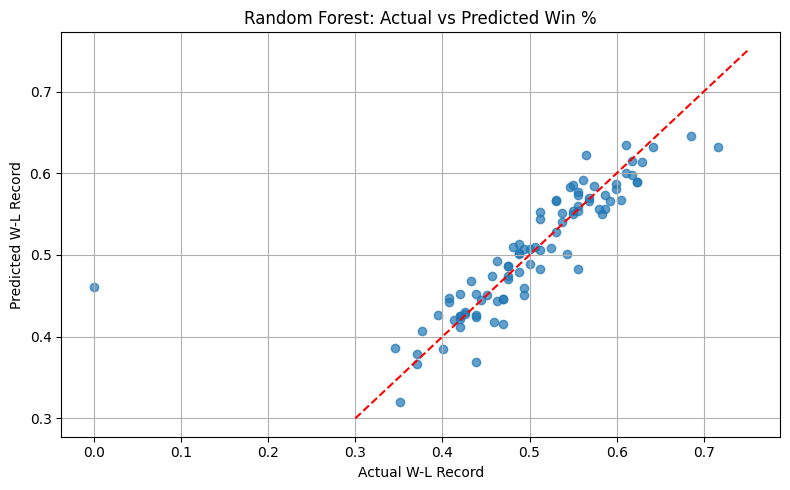

In [336]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0.3, 0.75], [0.3, 0.75], color='red', linestyle='--')
plt.xlabel("Actual W-L Record")
plt.ylabel("Predicted W-L Record")
plt.title("Random Forest: Actual vs Predicted Win %")
plt.grid(True)
plt.tight_layout()
plt.show()


In [337]:
results.to_csv('win_predictions.csv')